# Homework 2 Solution Scripts

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling

In [39]:
coordinates = pd.read_csv('coordinates_2_.csv')
demands = pd.read_csv('demand_2_.csv')
costs = pd.read_csv('costs_2_.csv')

A = np.asarray(coordinates) #first column= index of customer, second and third column= coordinates
H = np.abs(np.asarray(demands)) #first column= index of customer, second column= demand
C = np.abs(np.asarray(costs))   ##first column= index of facility, "i"th columns= cost of transporting 1 unit to the customer point "i"
A = A[:,1:]
H = H[:,1]
C = C[:,1:]  # index column is removed

In [14]:
def squaredDistSolforSingle(H=[], A=[], C=[], m=41):
    facility_m = C[m] #cost vector of facility m: cost of transporting 1 unit from facility m to customer points
                                     #np.multiply(H[:,1],facility_m ->> output : element wise multiplier of cost vector and demand values
                                     #np.dot(H[:,1], facility_m) ->> output: total cost of transportation of demand
                                     #np.multiply(np.multiply(H[:,1],facility_m),A[:,1]) ->> weighted average of coordinates   
    x_v1_star = (np.sum(np.multiply(np.multiply(H,facility_m),A[:,0]))/np.dot(H, facility_m))
    x_v2_star = (np.sum(np.multiply(np.multiply(H,facility_m),A[:,1]))/np.dot(H, facility_m))
    
    return x_v1_star, x_v2_star

20.5860754508008

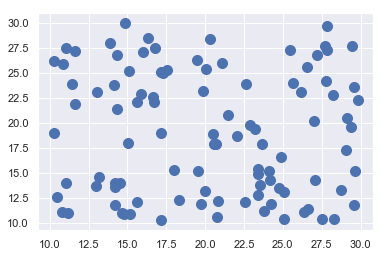

In [15]:
plt.scatter(A[:, 0], A[:, 1], s=np.size(A,axis=0))

x1, x2 = squaredDistSolforSingle(H,A,C,41)
x1


In [42]:
    cost_matrix = np.copy(C)
    for i in range(100):
        cost_matrix[:,i] = H[i]*C[:,i]
    cost_matrix

array([[ 40.90235915,  63.3598603 ,  64.42453248, ...,  60.49593336,
         44.56722294,  56.96188199],
       [ 21.64194504,  44.22082324,  64.50217651, ...,  40.35888521,
         31.39829086,  34.59689768],
       [ 78.51453231,  49.02828847,  99.92912887, ...,  75.63983721,
         25.85580419,  57.37941534],
       ...,
       [ 40.66170762,   8.49777147, 102.85588477, ...,  26.17697728,
         36.83676854,  56.68031952],
       [ 29.61080365,  23.84314129,  98.2732103 , ...,  54.13521543,
         27.1840509 ,  40.29233439],
       [ 29.85094147,  38.32434623,  85.12046204, ...,  65.78598573,
         48.08882639,  46.93668079]])

In [48]:

def ALAHeuristics(H=[], A=[], C=[], index_array=np.arange(100), seed=440): 
    cost_matrix = C
    for i in range(100):
        cost_matrix[:,i] = H[i]*C[:,i]
    # Initial step, random assignments of customers
    facility_customers = [[] for i in range(50)]
    facility_locations = np.zeros(shape=(50,2))
    np.random.seed(seed)
    customer_assignments = np.array([np.random.randint(0,50) for i in range(100)])
    for i in range(100):
        facility_customers[customer_assignments[i]].append(i)
    # Solving m single facility location problems and computing new objective value until no improvement
    objective = np.iinfo(np.int32).max
    while(True):
        for i in range(50):
            x1, x2 = squaredDistSolforSingle(H[facility_customers[i]],A[facility_customers[i]],C[:,facility_customers[i]],i)
            facility_locations[i] = np.array([x1,x2])
        # Objective value calculation
        new_objective = 0
        # TODO : Make calculation
        if(new_objective==objective):
            break
        objective = new_objective
        # Reassignment of customers according to distance to facilities
        facility_customers = [[] for i in range(50)]
        for i in range(100):
            coord_dif_matrix = facility_locations - A[i]
            # for squared euclidean distance
            distance_matrix = coord_dif_matrix[:,0]**2+coord_dif_matrix[:,1]**2
            total_cost_matrix = np.transpose(cost_matrix[:,i])*distance_matrix
            min_c = np.argmin(total_cost_matrix) # index of minimum value
            facility_customers[min_c].append(i)
            
    return facility_locations, objective

locations, objective =ALAHeuristics(H,A,C)

C:\Users\mehmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\mehmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [26]:
a = np.array([1,1,3,4])
b = np.array([1,1,2,2])
c = a**2+b**2

In [27]:
c

array([ 2,  2, 13, 20], dtype=int32)

In [28]:
c.argmin()

0